## **13. 이상치 탐지**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

### **데이터 탐색**

In [ ]:
"""
    데이터셋 로딩
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')#문자열을 타임스탬프로 변환하는 함수

path = './data/'
file = 'AirQualityUCI_refined.csv'

df = pd.read_csv(
    path + file,
    index_col=[0],
    parse_dates=[0],
    date_parser=parser
)

df.head()


C:\Users\yun\AppData\Local\Temp\ipykernel_14268\973794298.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


c:\Users\yun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\yun\anaconda3\Lib\site-packa

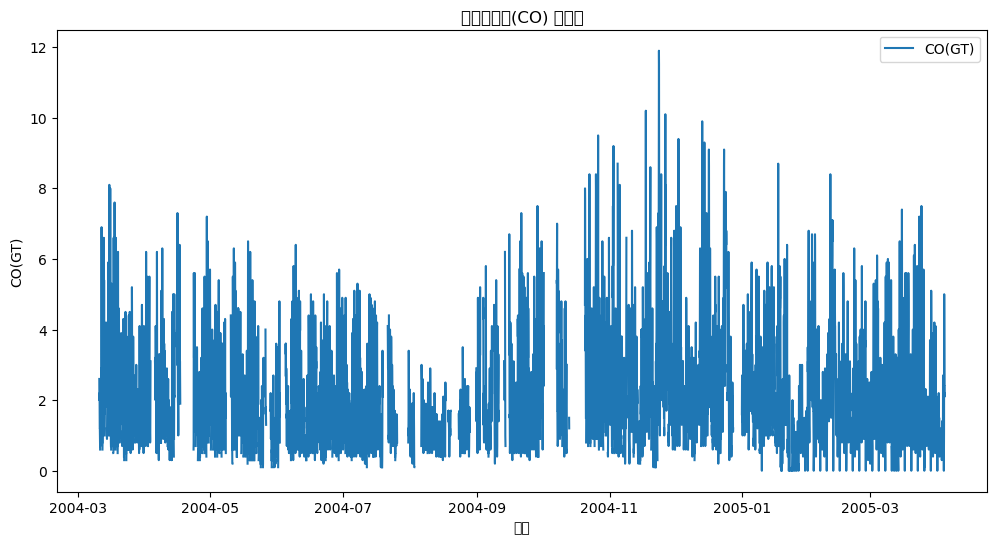

In [7]:
# [+] 일산화탄소 변수 (CO(GT)) 시각화
plt.figure(figsize=(12, 6))
plt.plot(df['CO(GT)'], label='CO(GT)')
plt.xlabel('시간')
plt.ylabel('CO(GT)')
plt.title('일산화탄소(CO) 시계열')
plt.legend()
plt.show()

In [9]:
# [+] 결측 데이터 처리: 선형 보간
co = df['CO(GT)'].copy() # Series 복사
co.interpolate(inplace=True) # 선형 보간

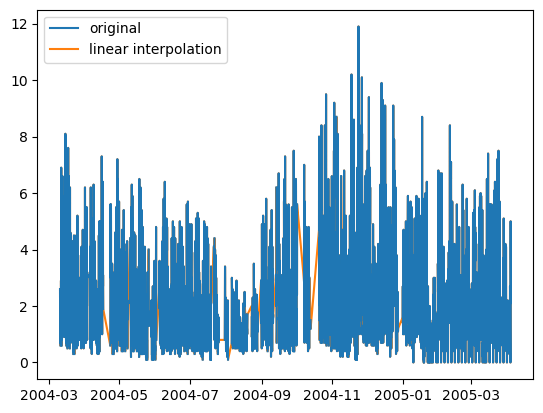

In [10]:
# 결측치 처리 결과 시각화
plt.plot(df['CO(GT)'], label='original', zorder=2)
plt.plot(co, label='linear interpolation', zorder=1)
plt.legend(loc='best')
plt.show()

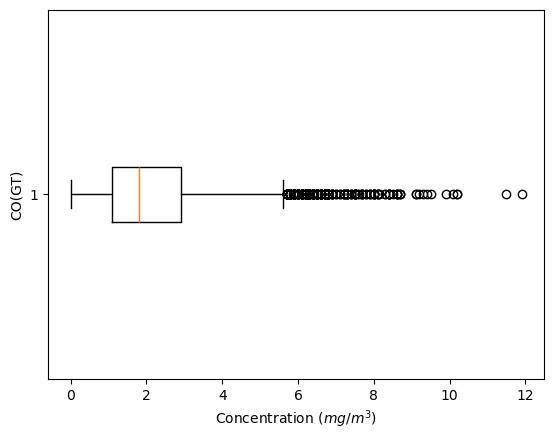

In [12]:
# [+] 이상치 시각화: 박스플롯
plt.boxplot(co, vert=False)
plt.ylabel('CO(GT)')
plt.xlabel('Concentration (${mg/m^3}$)')
plt.show()

In [13]:
# [+] 변수 간 상관관계 측정
corr_matrix = df.corr()
corr_matrix

,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
CO(GT),1.000000,0.877203,0.914973,0.792557,-0.701703,0.679262,0.639470,0.851403,0.040218,0.065809,0.845144
PT08.S1(CO),0.877203,1.000000,0.892964,0.713654,-0.771938,0.641529,0.682881,0.899324,0.114606,0.135324,0.883795
PT08.S2(NMHC),0.914973,0.892964,1.000000,0.704435,-0.796703,0.646245,0.777254,0.880578,-0.090380,0.186933,0.981950
NOx(GT),0.792557,0.713654,0.704435,1.000000,-0.655707,0.763111,0.233731,0.787046,0.221032,-0.149323,0.626638
PT08.S3(NOx),-0.701703,-0.771938,-0.796703,-0.655707,1.000000,-0.652083,-0.538468,-0.796569,-0.056740,-0.232017,-0.735744
NO2(GT),0.679262,0.641529,0.646245,0.763111,-0.652083,1.000000,0.157360,0.708128,-0.091759,-0.335022,0.544039
PT08.S4(NO2),0.639470,0.682881,0.777254,0.233731,-0.538468,0.157360,1.000000,0.591144,-0.032188,0.629641,0.765731
PT08.S5(O3),0.851403,0.899324,0.880578,0.787046,-0.796569,0.708128,0.591144,1.000000,0.124956,0.070751,0.865689
RH,0.040218,0.114606,-0.090380,0.221032,-0.056740,-0.091759,-0.032188,0.124956,1.000000,0.167971,-0.061681
AH,0.065809,0.135324,0.186933,-0.149323,-0.232017,-0.335022,0.629641,0.070751,0.167971,1.000000,0.167972


In [14]:
# 일산화탄소와 가장 상관관계가 약한 변수 선택
rh = df['RH'].copy().interpolate() # RH: 상대습도

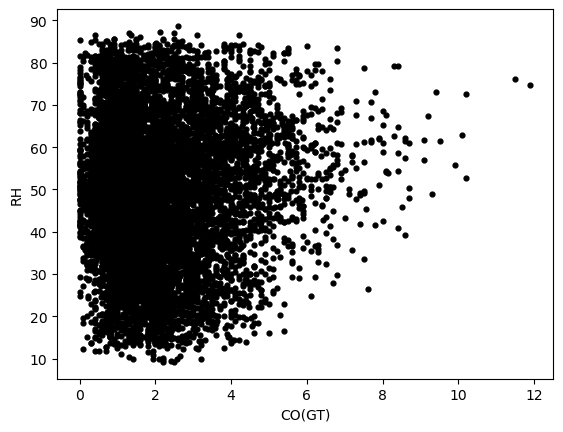

In [15]:
# 산포도 시각화
plt.scatter(co, rh, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel('RH')
plt.show()

In [16]:
# 일산화탄소와 가장 상관관계가 강한 변수 선택
nmhc = df['PT08.S2(NMHC)'].copy().interpolate() # NMHC: 비메탄계 탄화수소

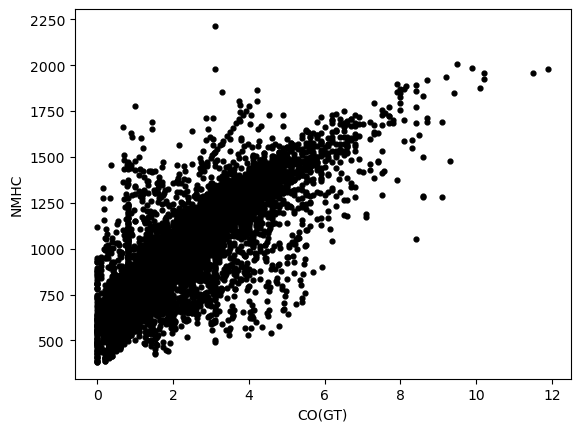

In [17]:
# 산포도 시각화
plt.scatter(co, nmhc, s=12, c='black')
plt.xlabel('CO(GT)')
plt.ylabel("NMHC")
plt.show()

### **사분위수 범위 기반 이상치 탐지**

In [18]:
# [+] Q1, Q2, Q3 계산
q1 = co.quantile(0.25)  # 1사분위수 하위 25%
q2 = co.quantile(0.5)   # 2사분위수 (중앙값) 
q3 = co.quantile(0.75)  # 3사분위수 상위25%
print(q1, q2, q3)

1.1 1.8 2.9


In [19]:
co

Datetime
2004-03-10 18:00:00    2.6
2004-03-10 19:00:00    2.0
2004-03-10 20:00:00    2.2
2004-03-10 21:00:00    2.2
2004-03-10 22:00:00    1.6
                      ... 
2005-04-04 10:00:00    3.1
2005-04-04 11:00:00    2.4
2005-04-04 12:00:00    2.4
2005-04-04 13:00:00    2.1
2005-04-04 14:00:00    2.2
Name: CO(GT), Length: 9357, dtype: float64

In [ ]:
# [+] IQR, 상한(upper_fence), 하한(lower_fence)
iqr = q3 - q1  # IQR: 사분위 범위
upper_fence = q3 + 1.5 * iqr  # 상한: Q3 + 1.5 * IQR
lower_fence = q1 - 1.5 * iqr  # 하한: Q1 - 1.5 * IQR, 음수값이라 의미가 없음음
print(iqr, upper_fence, lower_fence)

1.7999999999999998 5.6 -1.5999999999999996


In [23]:
# [+] 이상치 선택
outliers = co.loc[(co > upper_fence) | (co < lower_fence)]
outliers

Datetime
2004-03-11 19:00:00    6.9
2004-03-11 20:00:00    6.1
2004-03-12 20:00:00    6.6
2004-03-14 20:00:00    5.9
2004-03-15 09:00:00    8.1
                      ... 
2005-03-23 19:00:00    6.2
2005-03-23 20:00:00    7.2
2005-03-24 19:00:00    5.9
2005-03-24 20:00:00    7.5
2005-03-25 19:00:00    5.7
Name: CO(GT), Length: 224, dtype: float64

In [24]:
# [+] 이상치 여부 마스킹
mask = co.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

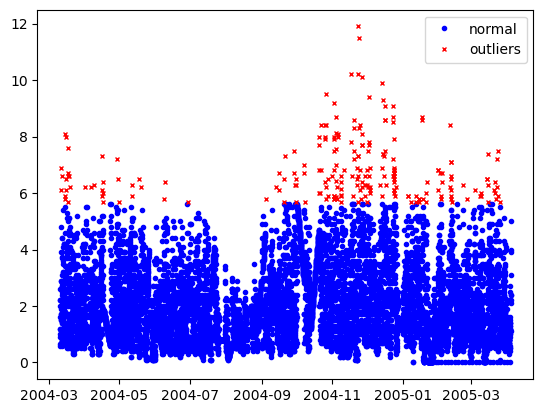

In [25]:
# 정상 데이터 / 이상치 시각화
plt.plot(co[~mask], label='normal', color='blue',#~mask는 이상치가 아닌 데이터의 인덱스를 True로 설정
    marker='o', markersize=3, linestyle='None')
plt.plot(outliers, label='outliers', color='red',
    marker='x', markersize=3, linestyle='None')
plt.legend(loc='best')

In [26]:
# [+] 이상치 제거
co_refined = co.copy()
co_refined[mask] = np.nan
co_refined[mask]

Datetime
2004-03-11 19:00:00   NaN
2004-03-11 20:00:00   NaN
2004-03-12 20:00:00   NaN
2004-03-14 20:00:00   NaN
2004-03-15 09:00:00   NaN
                       ..
2005-03-23 19:00:00   NaN
2005-03-23 20:00:00   NaN
2005-03-24 19:00:00   NaN
2005-03-24 20:00:00   NaN
2005-03-25 19:00:00   NaN
Name: CO(GT), Length: 224, dtype: float64

<Axes: xlabel='Datetime'>

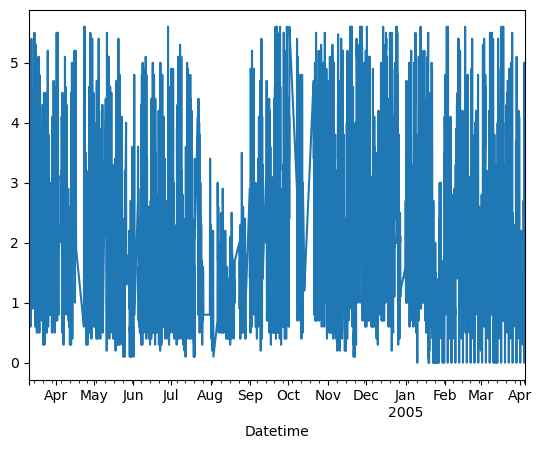

In [27]:
# [+] 제거된 이상치에 대한 대치: 선형보간
co_refined.interpolate(inplace=True)
co_refined.plot()

### **Z-점수 기반 이상치 탐지**

C:\Users\yun\AppData\Local\Temp\ipykernel_14268\4145667950.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(co)
c:\Users\yun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CO(GT)', ylabel='Density'>

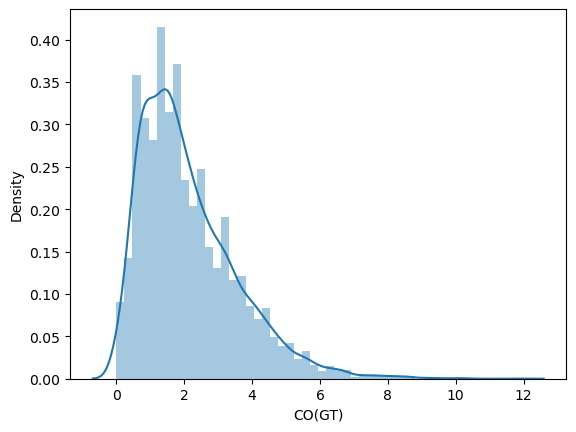

In [28]:
# 일산화탄소 변수 분포 시각화
import seaborn as sns
sns.distplot(co)

In [29]:
# [+] 평균, 표준편차
mean = co_refined.mean()  # 평균
std = co_refined.std()  # 표준편차
print(mean, std)

2.0705514588008977 1.2836844812977803


In [33]:
# [+] 데이터 포인트별 Z-점수 계산
outliers = []
thres = 3#임계치 3으로 지정

for i in co:
    Z_score = (i - mean) / std  # Z-점수 계산
    if(np.abs(Z_score) > thres):
        outliers.append(i)
print(outliers)

[6.9, 6.1, 6.6, 8.1, 6.1, 8.0, 6.5, 6.6, 7.6, 6.7, 6.6, 6.2, 6.2, 6.2, 6.3, 7.3, 6.1, 6.4, 6.0, 7.2, 6.5, 6.3, 6.5, 6.2, 6.4, 6.2, 6.1, 6.7, 6.5, 7.3, 6.7, 7.5, 6.3, 6.5, 6.3, 6.7, 7.0, 8.0, 7.7, 6.8, 6.0, 6.0, 8.4, 6.8, 7.9, 8.4, 8.0, 6.4, 8.4, 9.5, 6.2, 6.5, 6.6, 7.5, 6.8, 7.9, 8.0, 9.2, 6.433333333333334, 7.0, 7.566666666666666, 8.133333333333333, 8.7, 6.2, 8.1, 8.0, 6.6, 6.375, 6.1499999999999995, 5.925, 6.8, 7.8, 10.2, 6.6, 7.5, 7.2, 8.3, 8.6, 6.3, 6.9, 6.5, 6.6, 7.3, 7.3, 10.2, 11.9, 11.5, 8.3, 6.1, 6.8, 8.4, 6.2, 7.7, 10.1, 6.4, 7.7, 8.1, 6.3, 6.6, 6.3, 6.8, 6.2, 7.5, 7.7, 9.4, 7.8, 6.6, 6.0, 6.9, 6.1, 6.2, 6.3, 9.9, 6.9, 7.4, 9.3, 7.4, 6.6, 7.3, 7.5, 8.6, 9.1, 8.6, 6.3, 6.6, 8.5, 8.7, 9.1, 7.2, 6.1, 6.6, 6.5, 6.0, 6.9, 7.9, 6.1, 6.7, 6.8, 6.7, 6.4, 6.8, 6.2, 8.6, 8.7, 6.0, 6.4, 6.1, 6.8, 6.8, 6.7, 6.7, 6.4, 6.2, 8.4, 6.1, 7.1, 6.6, 6.5, 7.1, 6.3, 6.1, 6.0, 6.5, 6.5, 6.3, 7.4, 6.1, 6.4, 6.0, 6.2, 7.2, 7.5]


In [37]:
# [+] 이상치 선택
outliers = co.loc[np.abs((co - mean) / std) > thres]
print(outliers)


Datetime
2004-03-11 19:00:00    6.9
2004-03-11 20:00:00    6.1
2004-03-12 20:00:00    6.6
2004-03-15 09:00:00    8.1
2004-03-15 18:00:00    6.1
                      ... 
2005-03-21 19:00:00    6.4
2005-03-21 20:00:00    6.0
2005-03-23 19:00:00    6.2
2005-03-23 20:00:00    7.2
2005-03-24 20:00:00    7.5
Name: CO(GT), Length: 172, dtype: float64


In [38]:
# [+] 마스킹
mask = co.index.isin(outliers.index)  # 이상치 인덱스 마스킹
mask[:50]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

C:\Users\yun\AppData\Local\Temp\ipykernel_14268\802724061.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(co, axlabel='CO(GT)', label='original')
c:\Users\yun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yun\AppData\Local\Temp\ipykernel_14268\802724061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
s

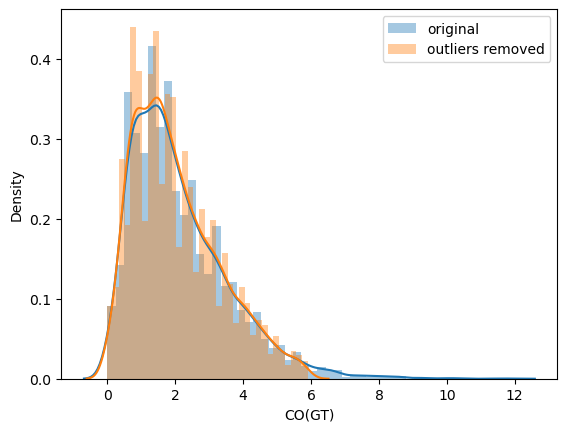

In [39]:
# 이상치 제거 전/후 분포 시각화
sns.distplot(co, axlabel='CO(GT)', label='original')
sns.distplot(co[~mask], label='outliers removed')
plt.legend(loc='best')
plt.show()

In [43]:
np.std(co)

1.1393593346414568

In [44]:
# 기타 이상치 제거 방법: Flooring, Capping
floor = co.quantile(0.1)
cap = co.quantile(0.9)

co.loc[co < floor] = floor
co.loc[co > cap] = cap

<Axes: xlabel='Datetime'>

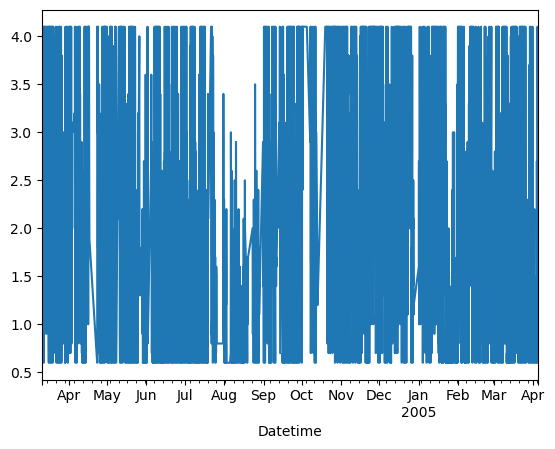

In [41]:
# 시각화
co.plot()